[칼럼 설명](https://drive.google.com/drive/folders/1uJzM2U7bO3LjtmovoOOmiJaZMcBNVZLJ)  
  

In [1]:
import pandas as pd
import numpy as np
from urllib.request import urlopen
import plotly.io as pio
import plotly.express as px
import plotly.graph_objects as go
import plotly.figure_factory as ff
from plotly.subplots import make_subplots
from plotly.validators.scatter.marker import SymbolValidator



In [2]:
df=pd.read_csv('/content/drive/MyDrive/AI/프리온보딩/기업과제/pretest_data.csv')

# 전처리

In [3]:
df.isnull().sum() 

video_id                      0
channel_id                    0
published_date                0
category_name                 0
duration                      0
tags                        370
description                  40
on_trending_date              0
off_trending_date             0
on_rank                       0
off_rank                      0
on_views                      0
off_views                     0
on_likes                      0
off_likes                     0
on_dislikes                   0
off_dislikes                  0
on_comments                   0
off_comments                  0
on_channel_subscribers        0
off_channel_subscribers       0
on_channel_total_views        0
off_channel_total_views       0
on_channel_total_videos       0
off_channel_total_videos      0
dtype: int64

In [4]:
df['tags'][df['tags'].isnull()]# tags와 description에 결측치가있지만 큰 영향이 없을거라 예상되 처리하지않음

2       NaN
9       NaN
12      NaN
16      NaN
18      NaN
       ... 
2580    NaN
2599    NaN
2605    NaN
2618    NaN
2624    NaN
Name: tags, Length: 370, dtype: object

In [5]:
df.columns #컬럼확인

Index(['video_id', 'channel_id', 'published_date', 'category_name', 'duration',
       'tags', 'description', 'on_trending_date', 'off_trending_date',
       'on_rank', 'off_rank', 'on_views', 'off_views', 'on_likes', 'off_likes',
       'on_dislikes', 'off_dislikes', 'on_comments', 'off_comments',
       'on_channel_subscribers', 'off_channel_subscribers',
       'on_channel_total_views', 'off_channel_total_views',
       'on_channel_total_videos', 'off_channel_total_videos'],
      dtype='object')

In [6]:
categorys=list(set(df.category_name)) #category 리스트화
categorys

['Sports',
 'Entertainment',
 'Nonprofits & Activism',
 'Science & Technology',
 'Education',
 'Gaming',
 'Music',
 'Pets & Animals',
 'Comedy',
 'Travel & Events',
 'News & Politics',
 'Autos & Vehicles',
 'People & Blogs',
 'Howto & Style',
 'Film & Animation']

In [7]:
df.describe().iloc[:,:12] #describe 컬럼이 많아 한번에 다 볼수가없어서 잘라서 확인

#rank에서 2위 인기동영상인데도 강등되는 경우가있다 (주목도가 줄거나 , 기간이 오래되면 내려가지않을까?)
#views ,  likes , dislikes ,  comments, subscribers 가 0인게 존재한다 



,on_rank,off_rank,on_views,off_views,on_likes,off_likes,on_dislikes,off_dislikes,on_comments,off_comments,on_channel_subscribers,off_channel_subscribers
count,2644.000000,2644.000000,2.644000e+03,2.644000e+03,2.644000e+03,2.644000e+03,2644.000000,2644.000000,2.644000e+03,2.644000e+03,2.644000e+03,2.644000e+03
mean,20.234493,35.795386,9.534819e+05,1.432732e+06,5.465813e+04,6.845384e+04,534.279879,860.402421,9.032085e+03,1.111202e+04,1.742059e+06,1.748095e+06
std,12.833115,10.376753,3.200375e+06,6.836354e+06,3.239337e+05,4.983217e+05,2070.643487,4754.238395,1.155321e+05,1.574601e+05,5.546694e+06,5.569829e+06
min,1.000000,1.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,9.000000,28.000000,2.353520e+05,3.068540e+05,4.208500e+03,4.932750e+03,86.000000,108.000000,5.110000e+02,5.977500e+02,1.480000e+05,1.507500e+05
50%,19.000000,37.000000,4.279245e+05,5.715080e+05,7.851000e+03,9.507000e+03,159.000000,211.000000,1.157000e+03,1.311500e+03,4.670000e+05,4.695000e+05
75%,30.000000,45.000000,8.268800e+05,1.119499e+06,1.688350e+04,2.085950e+04,315.000000,435.000000,2.720000e+03,3.150750e+03,1.272500e+06,1.282500e+06
max,50.000000,50.000000,9.727667e+07,2.488763e+08,8.097173e+06,1.575992e+07,37349.000000,133721.000000,4.625133e+06,6.659938e+06,5.890000e+07,5.940000e+07


In [8]:
df.describe().iloc[:,12:] #다 볼수가없어서 잘라서 확인

#비디오 하나로도 충분히 인기동영상에 올라갈 수 있다 

#인기동영상인데 조회수, 좋아요, 싫어요, 댓글, 구독자가 0인게 이해가 안가 찾아보았다

,on_channel_total_views,off_channel_total_views,on_channel_total_videos,off_channel_total_videos
count,2.644000e+03,2.644000e+03,2644.000000,2644.000000
mean,8.639525e+08,8.665469e+08,9276.285174,9229.746596
std,2.511740e+09,2.518026e+09,43156.370481,43100.803783
min,5.531600e+04,5.531600e+04,1.000000,1.000000
25%,3.698228e+07,3.780661e+07,118.000000,118.000000
50%,1.215355e+08,1.223838e+08,326.500000,327.500000
75%,4.857386e+08,4.878799e+08,1245.250000,1244.500000
max,2.170125e+10,2.170568e+10,545577.000000,545764.000000


In [9]:
df[df['on_views']==0][['on_dislikes','off_dislikes','on_comments','off_comments','on_views','on_likes','off_likes','on_channel_subscribers','off_channel_subscribers']]

,on_dislikes,off_dislikes,on_comments,off_comments,on_views,on_likes,off_likes,on_channel_subscribers,off_channel_subscribers
1855,0,0,0,0,0,0,0,1890000,1910000


In [10]:
df[df['on_likes']==0][['on_dislikes','off_dislikes','on_comments','off_comments','on_views','on_likes','off_likes','on_channel_subscribers','off_channel_subscribers']]

,on_dislikes,off_dislikes,on_comments,off_comments,on_views,on_likes,off_likes,on_channel_subscribers,off_channel_subscribers
59,0,0,10197,18609,444008,0,0,382000,380000
163,0,0,3345,3781,1136141,0,0,0,0
268,0,0,10473,11702,1702202,0,0,900000,905000
319,0,0,5757,5757,1031566,0,0,856000,856000
349,0,0,3272,3740,647616,0,0,843000,844000
379,0,0,388,413,146508,0,0,609000,612000
416,0,0,2791,2957,383338,0,0,13000,13100
531,0,0,2052,2052,97641,0,0,39600,39600
695,0,0,3470,3470,994407,0,0,962000,962000
856,0,0,11484,11484,1755699,0,0,1270000,1270000


In [11]:
df[df['on_comments']==0][['on_dislikes','off_dislikes','on_comments','off_comments','on_views','off_views','on_likes','off_likes','on_channel_subscribers','off_channel_subscribers']]

,on_dislikes,off_dislikes,on_comments,off_comments,on_views,off_views,on_likes,off_likes,on_channel_subscribers,off_channel_subscribers
55,5219,5219,0,0,5521217,5521217,235946,235946,14300000,14300000
115,117,133,0,0,309403,380947,4018,4381,0,0
151,231,645,0,0,236287,912241,20931,43189,110000,184000
316,39,39,0,0,113916,113916,3816,3816,4740,4740
846,312,576,0,0,423098,991104,11949,19627,208000,209000
895,7210,8624,0,0,7665554,8516300,313552,324468,14000000,14100000
961,1449,3296,0,0,2239892,5078629,325690,415790,469000,469000
1186,47,47,0,0,121441,121441,2279,2279,90,90
1215,1739,2771,0,0,696269,906104,12705,15040,55700,57100
1264,522,616,0,0,783621,911246,8732,9676,941000,943000


In [12]:
df[df['on_channel_subscribers']==0][['on_dislikes','off_dislikes','on_comments','off_comments','on_views','on_likes','off_likes','on_channel_subscribers','off_channel_subscribers']]

,on_dislikes,off_dislikes,on_comments,off_comments,on_views,on_likes,off_likes,on_channel_subscribers,off_channel_subscribers
115,117,133,0,0,309403,4018,4381,0,0
155,81,112,445,495,162450,2595,2976,0,0
163,0,0,3345,3781,1136141,0,0,0,0
170,84,92,263,279,193617,3075,3275,0,0
173,241,293,4565,5031,636301,46550,53209,0,0
...,...,...,...,...,...,...,...,...,...
2242,208,208,135,135,207167,4375,4375,0,0
2266,65,88,330,358,235371,1592,1777,0,0
2497,77,115,4816,5444,297261,19290,22500,0,0
2512,172,172,2021,2021,411601,24058,24058,0,0


적은것은 이해할수있지만 0 그리고 내려갈때까지 0인건 말이안되기에 제거하기로했다
추가로 이상치를 제거하려고했지만 상위권의 독보적인 수치는 일단 진짜라고 생각해 그대로 두기로했다 ( 순위같은 것 때문에)

In [13]:
df.drop(df[df['off_dislikes']==0].index,inplace=True) #on에서 0인게 이해가안가지만 off에는 집계가있다면 오류가 아닌것으로 판단
df.drop(df[df['off_comments']==0].index,inplace=True) 
df.drop(df[df['off_views']==0].index,inplace=True) 
df.drop(df[df['off_likes']==0].index,inplace=True) 
df.drop(df[df['off_channel_subscribers']==0].index,inplace=True) 

In [14]:
df.reset_index(inplace=True)

In [15]:
df.describe().iloc[:,:12] 

,index,on_rank,off_rank,on_views,off_views,on_likes,off_likes,on_dislikes,off_dislikes,on_comments,off_comments,on_channel_subscribers
count,2545.000000,2545.000000,2545.000000,2.545000e+03,2.545000e+03,2.545000e+03,2.545000e+03,2545.00000,2545.000000,2.545000e+03,2.545000e+03,2.545000e+03
mean,1327.899804,20.193713,35.888802,9.564523e+05,1.441919e+06,5.580257e+04,6.997621e+04,536.31277,865.934774,9.283713e+03,1.143386e+04,1.791528e+06
std,764.785871,12.881192,10.387302,3.247496e+06,6.954140e+06,3.298791e+05,5.076652e+05,2097.65221,4834.639523,1.177484e+05,1.604831e+05,5.633997e+06
min,0.000000,1.000000,1.000000,5.329700e+04,5.329700e+04,4.230000e+02,4.230000e+02,5.00000,8.000000,0.000000e+00,1.000000e+00,0.000000e+00
25%,665.000000,9.000000,28.000000,2.381240e+05,3.096540e+05,4.319000e+03,5.059000e+03,89.00000,111.000000,5.200000e+02,6.070000e+02,1.650000e+05
50%,1335.000000,19.000000,37.000000,4.293730e+05,5.724840e+05,7.912000e+03,9.608000e+03,162.00000,214.000000,1.161000e+03,1.323000e+03,4.820000e+05
75%,1991.000000,30.000000,45.000000,8.311480e+05,1.128712e+06,1.690900e+04,2.085500e+04,317.00000,435.000000,2.723000e+03,3.154000e+03,1.310000e+06
max,2643.000000,50.000000,50.000000,9.727667e+07,2.488763e+08,8.097173e+06,1.575992e+07,37349.00000,133721.000000,4.625133e+06,6.659938e+06,5.890000e+07


In [16]:
df.describe().iloc[:,12:] 

,off_channel_subscribers,on_channel_total_views,off_channel_total_views,on_channel_total_videos,off_channel_total_videos
count,2.545000e+03,2.545000e+03,2.545000e+03,2545.000000,2545.000000
mean,1.797712e+06,8.870534e+08,8.896835e+08,9604.513949,9556.123772
std,5.657529e+06,2.555634e+09,2.562033e+09,43953.994525,43897.680977
min,4.990000e+02,6.384500e+04,6.384500e+04,1.000000,1.000000
25%,1.680000e+05,3.837299e+07,3.934331e+07,121.000000,122.000000
50%,4.840000e+05,1.222753e+08,1.235758e+08,329.000000,330.000000
75%,1.320000e+06,4.933007e+08,4.945898e+08,1265.000000,1263.000000
max,5.940000e+07,2.170125e+10,2.170568e+10,545577.000000,545764.000000


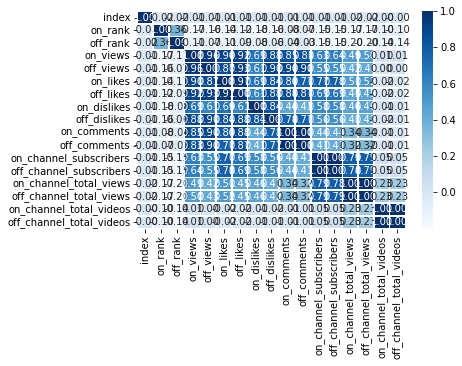

In [17]:
import seaborn as sb
sb.heatmap(data = df.corr(), annot=True, fmt = '.2f', linewidths=.5, cmap='Blues')
sb.set(rc={'figure.figsize':(20,13)})

# Q1 데이터 타입별 시각화

In [18]:
channel_count=df.groupby('channel_id').count().reset_index() #채널수 카운트
period_video=[]
for x in range(len(df['channel_id'])): #기간동안 비디오 갯수
    period_video.append(int(channel_count[channel_count['channel_id']==df['channel_id'][x]]['video_id']))
df['period_video']=period_video

## 전체기간 카테고리 -> 채널 -> 비디오개수

In [19]:
fig = make_subplots(rows=8,cols=2,
                    subplot_titles=categorys)
row=1
col=1
for num,category in enumerate(categorys): #번호와 month를 넣음  
    df_category=df[df.category_name==category]    #category 필터
    fig.add_trace(go.Scatter(x=df_category.on_trending_date,#수량만을 확인하려고 x,y축은 그냥 최대한 퍼뜨리는 식으로 넣었다
                            y=df_category.on_rank,
                            mode='markers',           #marker만 사용       
                            marker=dict(coloraxis="coloraxis",#컬러 축
                                        color=df_category.period_video,
                                        size=df_category.period_video*3),#크기가 너무작아 안보여 크게
                            text=df_category.period_video,#mouse hover시 표시되는 값
                            customdata=df_category.channel_id,#mouse hover시 표시되는 값
                            hovertemplate='<br>Channel_id:%{customdata}<br>Month_videos:%{text}'    #mouse hover시 표시설정                                                                
                            ),
                row=row,col=col)
    col+=1
    if col==3:# 다음위치에 배정
        row+=1
        col=1
fig.update_xaxes(showticklabels=False) #수량만 확인해서 x,y축 표시할 필요가없어 제거
fig.update_yaxes(showticklabels=False)
fig.update_layout(coloraxis=dict(colorscale='Plasma'), showlegend=False,#범례 제거
                  width=2000,
                  height=4000,)                  
fig.show()

## 월별 카테고리 -> 채널 -> 비디오 개수

In [20]:
df['published_date'].min(),df['published_date'].max() #데이터의기간은 3월부터 7월까지 전부 2021년도여서 월만 신경쓰면 될것같다

('2021-03-25', '2021-07-29')

In [21]:
df['month'] = pd.DatetimeIndex(df['published_date']).month #월별로만 만든 새로운 컬럼

In [22]:
months=list(set(df['month'])) # 존재하는 월로 만든 리스트

In [23]:
channel_count_m=df.groupby(['channel_id','month']).count().reset_index() #월별 채널아이디로 만들어진 비디오 수
period_m_count=[]
for i in range(len(df['channel_id'])): #행 별로 channel id와 month를 보고 맞는 갯수를 리스트에추가
    ch_id_filter=channel_count_m['channel_id']==df['channel_id'][i] 
    month_filter=channel_count_m['month']==df['month'][i]
    period_m_count.append(int(channel_count_m[ch_id_filter&month_filter]['video_id']))

df['period_m_count']=period_m_count #원본에 추가

In [24]:
n=0

In [25]:
fig = make_subplots(rows=3,cols=2, #subplot shape
                    subplot_titles=[f'{month} 월' for month in months]) #subplot별 title
row=1 
col=1
for month in months: #번호와 month를 넣음        
    df_category=df[df.category_name==categorys[n]] #category 필터
    df_month=df_category[df_category.month==month] #month 필터
    fig.add_trace(go.Scatter(x=df_month.on_trending_date, #수량만을 확인하려고 x,y축은 그냥 최대한 퍼뜨리는 식으로 넣었다
                            y=df_month.on_rank,
                            mode='markers', #marker만 사용                      
                            marker=dict(coloraxis="coloraxis", #컬러 축
                                        color=df_month.period_m_count, 
                                        size=df_month.period_m_count*5), #크기가 너무작아 안보여 크게
                            text=df_month.period_m_count, #mouse hover시 표시되는 값
                            customdata=df_month.channel_id,#mouse hover시 표시되는 값
                            hovertemplate='<br>Channel_id:%{customdata}<br>Month_videos:%{text}' #mouse hover시 표시설정                                                                   
                            ),
                row=row,col=col)
    col+=1
    if col==3: # 다음위치에 배정
        row+=1
        col=1


fig.update_xaxes(showticklabels=False) #수량만 확인해서 x,y축 표시할 필요가없어 제거
fig.update_yaxes(showticklabels=False)
fig.update_layout(coloraxis=dict(colorscale='Plasma'), showlegend=False, #범례 제거
                  width=1800,
                  height=1000,
                  title=categorys[n]) # 카테고리 표시
n+=1
fig.show()


In [26]:
fig = make_subplots(rows=3,cols=2, #subplot shape
                    subplot_titles=[f'{month} 월' for month in months]) #subplot별 title
row=1 
col=1
for month in months: #번호와 month를 넣음        
    df_category=df[df.category_name==categorys[n]] #category 필터
    df_month=df_category[df_category.month==month] #month 필터
    fig.add_trace(go.Scatter(x=df_month.on_trending_date, #수량만을 확인하려고 x,y축은 그냥 최대한 퍼뜨리는 식으로 넣었다
                            y=df_month.on_rank,
                            mode='markers', #marker만 사용                      
                            marker=dict(coloraxis="coloraxis", #컬러 축
                                        color=df_month.period_m_count, 
                                        size=df_month.period_m_count*5), #크기가 너무작아 안보여 크게
                            text=df_month.period_m_count, #mouse hover시 표시되는 값
                            customdata=df_month.channel_id,#mouse hover시 표시되는 값
                            hovertemplate='<br>Channel_id:%{customdata}<br>Month_videos:%{text}' #mouse hover시 표시설정                                                                   
                            ),
                row=row,col=col)
    col+=1
    if col==3: # 다음위치에 배정
        row+=1
        col=1


fig.update_xaxes(showticklabels=False) #수량만 확인해서 x,y축 표시할 필요가없어 제거
fig.update_yaxes(showticklabels=False)
fig.update_layout(coloraxis=dict(colorscale='Plasma'), showlegend=False, #범례 제거
                  width=1800,
                  height=1000,
                  title=categorys[n]) # 카테고리 표시
n+=1
fig.show()


In [27]:
fig = make_subplots(rows=3,cols=2, #subplot shape
                    subplot_titles=[f'{month} 월' for month in months]) #subplot별 title
row=1 
col=1
for month in months: #번호와 month를 넣음        
    df_category=df[df.category_name==categorys[n]] #category 필터
    df_month=df_category[df_category.month==month] #month 필터
    fig.add_trace(go.Scatter(x=df_month.on_trending_date, #수량만을 확인하려고 x,y축은 그냥 최대한 퍼뜨리는 식으로 넣었다
                            y=df_month.on_rank,
                            mode='markers', #marker만 사용                      
                            marker=dict(coloraxis="coloraxis", #컬러 축
                                        color=df_month.period_m_count, 
                                        size=df_month.period_m_count*5), #크기가 너무작아 안보여 크게
                            text=df_month.period_m_count, #mouse hover시 표시되는 값
                            customdata=df_month.channel_id,#mouse hover시 표시되는 값
                            hovertemplate='<br>Channel_id:%{customdata}<br>Month_videos:%{text}' #mouse hover시 표시설정                                                                   
                            ),
                row=row,col=col)
    col+=1
    if col==3: # 다음위치에 배정
        row+=1
        col=1


fig.update_xaxes(showticklabels=False) #수량만 확인해서 x,y축 표시할 필요가없어 제거
fig.update_yaxes(showticklabels=False)
fig.update_layout(coloraxis=dict(colorscale='Plasma'), showlegend=False, #범례 제거
                  width=1800,
                  height=1000,
                  title=categorys[n]) # 카테고리 표시
n+=1
fig.show()


In [28]:
fig = make_subplots(rows=3,cols=2, #subplot shape
                    subplot_titles=[f'{month} 월' for month in months]) #subplot별 title
row=1 
col=1
for month in months: #번호와 month를 넣음        
    df_category=df[df.category_name==categorys[n]] #category 필터
    df_month=df_category[df_category.month==month] #month 필터
    fig.add_trace(go.Scatter(x=df_month.on_trending_date, #수량만을 확인하려고 x,y축은 그냥 최대한 퍼뜨리는 식으로 넣었다
                            y=df_month.on_rank,
                            mode='markers', #marker만 사용                      
                            marker=dict(coloraxis="coloraxis", #컬러 축
                                        color=df_month.period_m_count, 
                                        size=df_month.period_m_count*5), #크기가 너무작아 안보여 크게
                            text=df_month.period_m_count, #mouse hover시 표시되는 값
                            customdata=df_month.channel_id,#mouse hover시 표시되는 값
                            hovertemplate='<br>Channel_id:%{customdata}<br>Month_videos:%{text}' #mouse hover시 표시설정                                                                   
                            ),
                row=row,col=col)
    col+=1
    if col==3: # 다음위치에 배정
        row+=1
        col=1


fig.update_xaxes(showticklabels=False) #수량만 확인해서 x,y축 표시할 필요가없어 제거
fig.update_yaxes(showticklabels=False)
fig.update_layout(coloraxis=dict(colorscale='Plasma'), showlegend=False, #범례 제거
                  width=1800,
                  height=1000,
                  title=categorys[n]) # 카테고리 표시
n+=1
fig.show()


In [29]:
fig = make_subplots(rows=3,cols=2, #subplot shape
                    subplot_titles=[f'{month} 월' for month in months]) #subplot별 title
row=1 
col=1
for month in months: #번호와 month를 넣음        
    df_category=df[df.category_name==categorys[n]] #category 필터
    df_month=df_category[df_category.month==month] #month 필터
    fig.add_trace(go.Scatter(x=df_month.on_trending_date, #수량만을 확인하려고 x,y축은 그냥 최대한 퍼뜨리는 식으로 넣었다
                            y=df_month.on_rank,
                            mode='markers', #marker만 사용                      
                            marker=dict(coloraxis="coloraxis", #컬러 축
                                        color=df_month.period_m_count, 
                                        size=df_month.period_m_count*5), #크기가 너무작아 안보여 크게
                            text=df_month.period_m_count, #mouse hover시 표시되는 값
                            customdata=df_month.channel_id,#mouse hover시 표시되는 값
                            hovertemplate='<br>Channel_id:%{customdata}<br>Month_videos:%{text}' #mouse hover시 표시설정                                                                   
                            ),
                row=row,col=col)
    col+=1
    if col==3: # 다음위치에 배정
        row+=1
        col=1


fig.update_xaxes(showticklabels=False) #수량만 확인해서 x,y축 표시할 필요가없어 제거
fig.update_yaxes(showticklabels=False)
fig.update_layout(coloraxis=dict(colorscale='Plasma'), showlegend=False, #범례 제거
                  width=1800,
                  height=1000,
                  title=categorys[n]) # 카테고리 표시
n+=1
fig.show()


In [30]:
fig = make_subplots(rows=3,cols=2, #subplot shape
                    subplot_titles=[f'{month} 월' for month in months]) #subplot별 title
row=1 
col=1
for month in months: #번호와 month를 넣음        
    df_category=df[df.category_name==categorys[n]] #category 필터
    df_month=df_category[df_category.month==month] #month 필터
    fig.add_trace(go.Scatter(x=df_month.on_trending_date, #수량만을 확인하려고 x,y축은 그냥 최대한 퍼뜨리는 식으로 넣었다
                            y=df_month.on_rank,
                            mode='markers', #marker만 사용                      
                            marker=dict(coloraxis="coloraxis", #컬러 축
                                        color=df_month.period_m_count, 
                                        size=df_month.period_m_count*5), #크기가 너무작아 안보여 크게
                            text=df_month.period_m_count, #mouse hover시 표시되는 값
                            customdata=df_month.channel_id,#mouse hover시 표시되는 값
                            hovertemplate='<br>Channel_id:%{customdata}<br>Month_videos:%{text}' #mouse hover시 표시설정                                                                   
                            ),
                row=row,col=col)
    col+=1
    if col==3: # 다음위치에 배정
        row+=1
        col=1


fig.update_xaxes(showticklabels=False) #수량만 확인해서 x,y축 표시할 필요가없어 제거
fig.update_yaxes(showticklabels=False)
fig.update_layout(coloraxis=dict(colorscale='Plasma'), showlegend=False, #범례 제거
                  width=1800,
                  height=1000,
                  title=categorys[n]) # 카테고리 표시
n+=1
fig.show()


In [31]:
fig = make_subplots(rows=3,cols=2, #subplot shape
                    subplot_titles=[f'{month} 월' for month in months]) #subplot별 title
row=1 
col=1
for month in months: #번호와 month를 넣음        
    df_category=df[df.category_name==categorys[n]] #category 필터
    df_month=df_category[df_category.month==month] #month 필터
    fig.add_trace(go.Scatter(x=df_month.on_trending_date, #수량만을 확인하려고 x,y축은 그냥 최대한 퍼뜨리는 식으로 넣었다
                            y=df_month.on_rank,
                            mode='markers', #marker만 사용                      
                            marker=dict(coloraxis="coloraxis", #컬러 축
                                        color=df_month.period_m_count, 
                                        size=df_month.period_m_count*5), #크기가 너무작아 안보여 크게
                            text=df_month.period_m_count, #mouse hover시 표시되는 값
                            customdata=df_month.channel_id,#mouse hover시 표시되는 값
                            hovertemplate='<br>Channel_id:%{customdata}<br>Month_videos:%{text}' #mouse hover시 표시설정                                                                   
                            ),
                row=row,col=col)
    col+=1
    if col==3: # 다음위치에 배정
        row+=1
        col=1


fig.update_xaxes(showticklabels=False) #수량만 확인해서 x,y축 표시할 필요가없어 제거
fig.update_yaxes(showticklabels=False)
fig.update_layout(coloraxis=dict(colorscale='Plasma'), showlegend=False, #범례 제거
                  width=1800,
                  height=1000,
                  title=categorys[n]) # 카테고리 표시
n+=1
fig.show()


In [32]:
fig = make_subplots(rows=3,cols=2, #subplot shape
                    subplot_titles=[f'{month} 월' for month in months]) #subplot별 title
row=1 
col=1
for month in months: #번호와 month를 넣음        
    df_category=df[df.category_name==categorys[n]] #category 필터
    df_month=df_category[df_category.month==month] #month 필터
    fig.add_trace(go.Scatter(x=df_month.on_trending_date, #수량만을 확인하려고 x,y축은 그냥 최대한 퍼뜨리는 식으로 넣었다
                            y=df_month.on_rank,
                            mode='markers', #marker만 사용                      
                            marker=dict(coloraxis="coloraxis", #컬러 축
                                        color=df_month.period_m_count, 
                                        size=df_month.period_m_count*5), #크기가 너무작아 안보여 크게
                            text=df_month.period_m_count, #mouse hover시 표시되는 값
                            customdata=df_month.channel_id,#mouse hover시 표시되는 값
                            hovertemplate='<br>Channel_id:%{customdata}<br>Month_videos:%{text}' #mouse hover시 표시설정                                                                   
                            ),
                row=row,col=col)
    col+=1
    if col==3: # 다음위치에 배정
        row+=1
        col=1


fig.update_xaxes(showticklabels=False) #수량만 확인해서 x,y축 표시할 필요가없어 제거
fig.update_yaxes(showticklabels=False)
fig.update_layout(coloraxis=dict(colorscale='Plasma'), showlegend=False, #범례 제거
                  width=1800,
                  height=1000,
                  title=categorys[n]) # 카테고리 표시
n+=1
fig.show()


In [33]:
fig = make_subplots(rows=3,cols=2, #subplot shape
                    subplot_titles=[f'{month} 월' for month in months]) #subplot별 title
row=1 
col=1
for month in months: #번호와 month를 넣음        
    df_category=df[df.category_name==categorys[n]] #category 필터
    df_month=df_category[df_category.month==month] #month 필터
    fig.add_trace(go.Scatter(x=df_month.on_trending_date, #수량만을 확인하려고 x,y축은 그냥 최대한 퍼뜨리는 식으로 넣었다
                            y=df_month.on_rank,
                            mode='markers', #marker만 사용                      
                            marker=dict(coloraxis="coloraxis", #컬러 축
                                        color=df_month.period_m_count, 
                                        size=df_month.period_m_count*5), #크기가 너무작아 안보여 크게
                            text=df_month.period_m_count, #mouse hover시 표시되는 값
                            customdata=df_month.channel_id,#mouse hover시 표시되는 값
                            hovertemplate='<br>Channel_id:%{customdata}<br>Month_videos:%{text}' #mouse hover시 표시설정                                                                   
                            ),
                row=row,col=col)
    col+=1
    if col==3: # 다음위치에 배정
        row+=1
        col=1


fig.update_xaxes(showticklabels=False) #수량만 확인해서 x,y축 표시할 필요가없어 제거
fig.update_yaxes(showticklabels=False)
fig.update_layout(coloraxis=dict(colorscale='Plasma'), showlegend=False, #범례 제거
                  width=1800,
                  height=1000,
                  title=categorys[n]) # 카테고리 표시
n+=1
fig.show()


In [34]:
fig = make_subplots(rows=3,cols=2, #subplot shape
                    subplot_titles=[f'{month} 월' for month in months]) #subplot별 title
row=1 
col=1
for month in months: #번호와 month를 넣음        
    df_category=df[df.category_name==categorys[n]] #category 필터
    df_month=df_category[df_category.month==month] #month 필터
    fig.add_trace(go.Scatter(x=df_month.on_trending_date, #수량만을 확인하려고 x,y축은 그냥 최대한 퍼뜨리는 식으로 넣었다
                            y=df_month.on_rank,
                            mode='markers', #marker만 사용                      
                            marker=dict(coloraxis="coloraxis", #컬러 축
                                        color=df_month.period_m_count, 
                                        size=df_month.period_m_count*5), #크기가 너무작아 안보여 크게
                            text=df_month.period_m_count, #mouse hover시 표시되는 값
                            customdata=df_month.channel_id,#mouse hover시 표시되는 값
                            hovertemplate='<br>Channel_id:%{customdata}<br>Month_videos:%{text}' #mouse hover시 표시설정                                                                   
                            ),
                row=row,col=col)
    col+=1
    if col==3: # 다음위치에 배정
        row+=1
        col=1


fig.update_xaxes(showticklabels=False) #수량만 확인해서 x,y축 표시할 필요가없어 제거
fig.update_yaxes(showticklabels=False)
fig.update_layout(coloraxis=dict(colorscale='Plasma'), showlegend=False, #범례 제거
                  width=1800,
                  height=1000,
                  title=categorys[n]) # 카테고리 표시
n+=1
fig.show()


In [35]:
fig = make_subplots(rows=3,cols=2, #subplot shape
                    subplot_titles=[f'{month} 월' for month in months]) #subplot별 title
row=1 
col=1
for month in months: #번호와 month를 넣음        
    df_category=df[df.category_name==categorys[n]] #category 필터
    df_month=df_category[df_category.month==month] #month 필터
    fig.add_trace(go.Scatter(x=df_month.on_trending_date, #수량만을 확인하려고 x,y축은 그냥 최대한 퍼뜨리는 식으로 넣었다
                            y=df_month.on_rank,
                            mode='markers', #marker만 사용                      
                            marker=dict(coloraxis="coloraxis", #컬러 축
                                        color=df_month.period_m_count, 
                                        size=df_month.period_m_count*5), #크기가 너무작아 안보여 크게
                            text=df_month.period_m_count, #mouse hover시 표시되는 값
                            customdata=df_month.channel_id,#mouse hover시 표시되는 값
                            hovertemplate='<br>Channel_id:%{customdata}<br>Month_videos:%{text}' #mouse hover시 표시설정                                                                   
                            ),
                row=row,col=col)
    col+=1
    if col==3: # 다음위치에 배정
        row+=1
        col=1


fig.update_xaxes(showticklabels=False) #수량만 확인해서 x,y축 표시할 필요가없어 제거
fig.update_yaxes(showticklabels=False)
fig.update_layout(coloraxis=dict(colorscale='Plasma'), showlegend=False, #범례 제거
                  width=1800,
                  height=1000,
                  title=categorys[n]) # 카테고리 표시
n+=1
fig.show()


In [36]:
fig = make_subplots(rows=3,cols=2, #subplot shape
                    subplot_titles=[f'{month} 월' for month in months]) #subplot별 title
row=1 
col=1
for month in months: #번호와 month를 넣음        
    df_category=df[df.category_name==categorys[n]] #category 필터
    df_month=df_category[df_category.month==month] #month 필터
    fig.add_trace(go.Scatter(x=df_month.on_trending_date, #수량만을 확인하려고 x,y축은 그냥 최대한 퍼뜨리는 식으로 넣었다
                            y=df_month.on_rank,
                            mode='markers', #marker만 사용                      
                            marker=dict(coloraxis="coloraxis", #컬러 축
                                        color=df_month.period_m_count, 
                                        size=df_month.period_m_count*5), #크기가 너무작아 안보여 크게
                            text=df_month.period_m_count, #mouse hover시 표시되는 값
                            customdata=df_month.channel_id,#mouse hover시 표시되는 값
                            hovertemplate='<br>Channel_id:%{customdata}<br>Month_videos:%{text}' #mouse hover시 표시설정                                                                   
                            ),
                row=row,col=col)
    col+=1
    if col==3: # 다음위치에 배정
        row+=1
        col=1


fig.update_xaxes(showticklabels=False) #수량만 확인해서 x,y축 표시할 필요가없어 제거
fig.update_yaxes(showticklabels=False)
fig.update_layout(coloraxis=dict(colorscale='Plasma'), showlegend=False, #범례 제거
                  width=1800,
                  height=1000,
                  title=categorys[n]) # 카테고리 표시
n+=1
fig.show()


In [37]:
fig = make_subplots(rows=3,cols=2, #subplot shape
                    subplot_titles=[f'{month} 월' for month in months]) #subplot별 title
row=1 
col=1
for month in months: #번호와 month를 넣음        
    df_category=df[df.category_name==categorys[n]] #category 필터
    df_month=df_category[df_category.month==month] #month 필터
    fig.add_trace(go.Scatter(x=df_month.on_trending_date, #수량만을 확인하려고 x,y축은 그냥 최대한 퍼뜨리는 식으로 넣었다
                            y=df_month.on_rank,
                            mode='markers', #marker만 사용                      
                            marker=dict(coloraxis="coloraxis", #컬러 축
                                        color=df_month.period_m_count, 
                                        size=df_month.period_m_count*5), #크기가 너무작아 안보여 크게
                            text=df_month.period_m_count, #mouse hover시 표시되는 값
                            customdata=df_month.channel_id,#mouse hover시 표시되는 값
                            hovertemplate='<br>Channel_id:%{customdata}<br>Month_videos:%{text}' #mouse hover시 표시설정                                                                   
                            ),
                row=row,col=col)
    col+=1
    if col==3: # 다음위치에 배정
        row+=1
        col=1


fig.update_xaxes(showticklabels=False) #수량만 확인해서 x,y축 표시할 필요가없어 제거
fig.update_yaxes(showticklabels=False)
fig.update_layout(coloraxis=dict(colorscale='Plasma'), showlegend=False, #범례 제거
                  width=1800,
                  height=1000,
                  title=categorys[n]) # 카테고리 표시
n+=1
fig.show()


In [38]:
fig = make_subplots(rows=3,cols=2, #subplot shape
                    subplot_titles=[f'{month} 월' for month in months]) #subplot별 title
row=1 
col=1
for month in months: #번호와 month를 넣음        
    df_category=df[df.category_name==categorys[n]] #category 필터
    df_month=df_category[df_category.month==month] #month 필터
    fig.add_trace(go.Scatter(x=df_month.on_trending_date, #수량만을 확인하려고 x,y축은 그냥 최대한 퍼뜨리는 식으로 넣었다
                            y=df_month.on_rank,
                            mode='markers', #marker만 사용                      
                            marker=dict(coloraxis="coloraxis", #컬러 축
                                        color=df_month.period_m_count, 
                                        size=df_month.period_m_count*5), #크기가 너무작아 안보여 크게
                            text=df_month.period_m_count, #mouse hover시 표시되는 값
                            customdata=df_month.channel_id,#mouse hover시 표시되는 값
                            hovertemplate='<br>Channel_id:%{customdata}<br>Month_videos:%{text}' #mouse hover시 표시설정                                                                   
                            ),
                row=row,col=col)
    col+=1
    if col==3: # 다음위치에 배정
        row+=1
        col=1


fig.update_xaxes(showticklabels=False) #수량만 확인해서 x,y축 표시할 필요가없어 제거
fig.update_yaxes(showticklabels=False)
fig.update_layout(coloraxis=dict(colorscale='Plasma'), showlegend=False, #범례 제거
                  width=1800,
                  height=1000,
                  title=categorys[n]) # 카테고리 표시
n+=1
fig.show()


In [39]:
fig = make_subplots(rows=3,cols=2, #subplot shape
                    subplot_titles=[f'{month} 월' for month in months]) #subplot별 title
row=1 
col=1
for month in months: #번호와 month를 넣음        
    df_category=df[df.category_name==categorys[n]] #category 필터
    df_month=df_category[df_category.month==month] #month 필터
    fig.add_trace(go.Scatter(x=df_month.on_trending_date, #수량만을 확인하려고 x,y축은 그냥 최대한 퍼뜨리는 식으로 넣었다
                            y=df_month.on_rank,
                            mode='markers', #marker만 사용                      
                            marker=dict(coloraxis="coloraxis", #컬러 축
                                        color=df_month.period_m_count, 
                                        size=df_month.period_m_count*5), #크기가 너무작아 안보여 크게
                            text=df_month.period_m_count, #mouse hover시 표시되는 값
                            customdata=df_month.channel_id,#mouse hover시 표시되는 값
                            hovertemplate='<br>Channel_id:%{customdata}<br>Month_videos:%{text}' #mouse hover시 표시설정                                                                   
                            ),
                row=row,col=col)
    col+=1
    if col==3: # 다음위치에 배정
        row+=1
        col=1


fig.update_xaxes(showticklabels=False) #수량만 확인해서 x,y축 표시할 필요가없어 제거
fig.update_yaxes(showticklabels=False)
fig.update_layout(coloraxis=dict(colorscale='Plasma'), showlegend=False, #범례 제거
                  width=1800,
                  height=1000,
                  title=categorys[n]) # 카테고리 표시
n+=1
fig.show()


## 월별 top10 채널( 분류 기준은 비디오 개수)

In [40]:
fig = make_subplots(rows=3,cols=2, #subplot shape
                    subplot_titles=[f'{month} 월' for month in months]) #subplot별 title
row=1 
col=1
for month in months: #번호와 month를 넣음        
    df_top10=df[df['month']==month].sort_values('off_channel_total_videos',ascending=False).drop_duplicates(subset=['channel_id'],keep='last').head(10).reset_index() #월 & top10 필터   
    df_top10['ranks']=df_top10.index+1


    fig.add_trace(go.Bar(x=df_top10.channel_id, 
                            y=df_top10.off_channel_total_videos,
                            #mode='markers', #marker만 사용                      
                            marker=dict(coloraxis="coloraxis", #컬러 축
                                        color=df_top10.off_channel_total_videos,),                             
                            customdata=[ f'channel_id : {id}<br>total_video : {total}<br>month_video : {m}<br>rank : {rk}'for total,m,id,rk in zip(df_top10.off_channel_total_videos,df_top10.period_m_count,df_top10.channel_id,df_top10.ranks)],#mouse hover시 표시되는 값
                            hovertemplate='%{customdata}' #mouse hover시 표시설정                                                                   
                            ),
                row=row,col=col)
   
    col+=1
    if col==3: # 다음위치에 배정
        row+=1
        col=1

fig.update_layout(coloraxis=dict(colorscale='Plasma'), showlegend=False, #범례 제거
                  width=1800,
                  height=1000,
                  #title=month[n]
                  ) # 카테고리 표시
fig.show()


## 주별 top5

In [41]:
df['published_todate'] = pd.to_datetime(df.published_date) #날짜 비교를 위해 to datatime

In [42]:
df_resample_w=df.resample(rule='1W', on='published_todate') #주간별로 리샘플
df_resample_w=list(df_resample_w.first().index) #주간별 리샘플의 인덱스 ( 날짜가나옴)를 리스트화
#.sort_values('off_channel_total_videos',ascending=True)
#drop_duplicates(subset=['channel_id'],keep='last').tail(10)

In [43]:
m,w=3,4 # subplot 월 주 표시를 위해 리스트를 만듬
week_m,week_w=[],[]
while m <9 :
    week_m.append(m)
    week_w.append(w)
    if w ==4:
        m+=1
        w=1
    else:w+=1

In [44]:
fig = make_subplots(rows=5,cols=4, #subplot shape
                    subplot_titles=[f'{m} 월 {w} 주' for m,w in zip(week_m,week_w)]) #subplot별 title

row=1 
col=1
for num in range(len(df_resample_w)): #주간별로 리샘플된 기간을 기준으로 주간별 데이터를 사용
    if df_resample_w[num]==df_resample_w[0]: #맨 앞 주간일떄
        data=df[df['published_todate']<df_resample_w[0]] #
    elif df_resample_w[num]==df_resample_w[len(df_resample_w)-1]:#마지막 주간일떄
        data=df[df['published_todate']>df_resample_w[len(df_resample_w)-1]]
    else:
        small = df['published_todate']<df_resample_w[num+1]
        big =df['published_todate']>df_resample_w[num]
        data=df[big & small]
    data_top5=data.sort_values('off_channel_total_videos',ascending=False).drop_duplicates(subset=['channel_id'],keep='last').head(5).reset_index() #정렬,중복제거,top5
    data_top5['ranks']= data_top5.index+1

    fig.add_trace(go.Bar(x=data_top5.channel_id, 
                            y=data_top5.off_channel_total_videos,
                            #mode='markers', #marker만 사용                      
                            marker=dict(coloraxis="coloraxis", #컬러 축
                                        color=data_top5.off_channel_total_videos,),                             
                            customdata=[ f'channel_id : {id}<br>w_total : {total}<br>ranks : {rk}' for total,id,rk in zip(data_top5.off_channel_total_videos,data_top5.channel_id,data_top5.ranks)],#mouse hover시 표시되는 값
                            hovertemplate='%{customdata}' #mouse hover시 표시설정                                                                   
                            ),
                row=row,col=col)   

    col+=1
    if col==5: # 다음위치에 배정
        row+=1
        col=1

fig.update_layout(coloraxis=dict(colorscale='Plasma'), showlegend=False, #범례 제거
                  width=1800,
                  height=1000,                  
                  ) # 카테고리 표시
fig.show()


## 월별 카테고리별 태그 키워드 순위

In [45]:
tags_all=[]
for tag_li in list(df['tags'].str.split('|')): #태그들을 | 기준으로 나누고 전부 평면으로 만든다
    if type(tag_li) ==float:continue      
    for tag in tag_li :        
        tags_all.append(tag)
tags_all=pd.DataFrame(tags_all)#dataframe으로 변경
tags_all=pd.DataFrame(tags_all.value_counts(),columns = ['Counts']).sort_values('Counts',ascending=False).reset_index() #tag counts로 정렬 , 리셋인덱스
tags_all.columns=['tag','counts'] #컬럼명 변경

In [46]:
tags_all #전체 tag 순위

,tag,counts
0,먹방,164
1,예능,98
2,레전드,73
3,유재석,70
4,브이로그,68
...,...,...
20332,우빈,1
20333,우리나라 경제,1
20334,집밥 레시피,1
20335,태양의 후예,1


In [47]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import matplotlib.font_manager as fm

In [48]:
!apt-get install fonts-nanum* -qq #나눔폰트설치

Selecting previously unselected package fonts-nanum.
(Reading database ... 155320 files and directories currently installed.)
Preparing to unpack .../fonts-nanum_20170925-1_all.deb ...
Unpacking fonts-nanum (20170925-1) ...
Selecting previously unselected package fonts-nanum-eco.
Preparing to unpack .../fonts-nanum-eco_1.000-6_all.deb ...
Unpacking fonts-nanum-eco (1.000-6) ...
Selecting previously unselected package fonts-nanum-extra.
Preparing to unpack .../fonts-nanum-extra_20170925-1_all.deb ...
Unpacking fonts-nanum-extra (20170925-1) ...
Selecting previously unselected package fonts-nanum-coding.
Preparing to unpack .../fonts-nanum-coding_2.5-1_all.deb ...
Unpacking fonts-nanum-coding (2.5-1) ...
Setting up fonts-nanum-extra (20170925-1) ...
Setting up fonts-nanum (20170925-1) ...
Setting up fonts-nanum-coding (2.5-1) ...
Setting up fonts-nanum-eco (1.000-6) ...
Processing triggers for fontconfig (2.12.6-0ubuntu2) ...


In [49]:
sys_font=fm.findSystemFonts() #설치위치 확인
[f for f in sys_font if 'Nanum' in f]

['/usr/share/fonts/truetype/nanum/NanumMyeongjoBold.ttf',
 '/usr/share/fonts/truetype/nanum/NanumSquareB.ttf',
 '/usr/share/fonts/truetype/nanum/NanumSquareRoundB.ttf',
 '/usr/share/fonts/truetype/nanum/NanumSquareL.ttf',
 '/usr/share/fonts/truetype/nanum/NanumSquareR.ttf',
 '/usr/share/fonts/truetype/nanum/NanumSquareRoundR.ttf',
 '/usr/share/fonts/truetype/nanum/NanumSquareEB.ttf',
 '/usr/share/fonts/truetype/nanum/NanumBarunGothicUltraLight.ttf',
 '/usr/share/fonts/truetype/nanum/NanumMyeongjo.ttf',
 '/usr/share/fonts/truetype/nanum/NanumMyeongjoEco.ttf',
 '/usr/share/fonts/truetype/nanum/NanumBarunpenB.ttf',
 '/usr/share/fonts/truetype/nanum/NanumGothicEco.ttf',
 '/usr/share/fonts/truetype/nanum/NanumGothicCoding.ttf',
 '/usr/share/fonts/truetype/nanum/NanumBarunpenR.ttf',
 '/usr/share/fonts/truetype/nanum/NanumGothicEcoBold.ttf',
 '/usr/share/fonts/truetype/nanum/NanumMyeongjoEcoExtraBold.ttf',
 '/usr/share/fonts/truetype/nanum/NanumGothicBold.ttf',
 '/usr/share/fonts/truetype/nan

In [50]:
path ='/usr/share/fonts/truetype/nanum/NanumGothicCoding-Bold.ttf' #plt 폰트설정
font_name = fm.FontProperties(fname=path,size=10).get_name()
print(font_name)
plt.rc('font',family=font_name)
fm._rebuild()

NanumGothicCoding


findfont: Font family ['NanumGothicCoding'] not found. Falling back to DejaVu Sans.
findfont: Font family ['NanumGothicCoding'] not found. Falling back to DejaVu Sans.


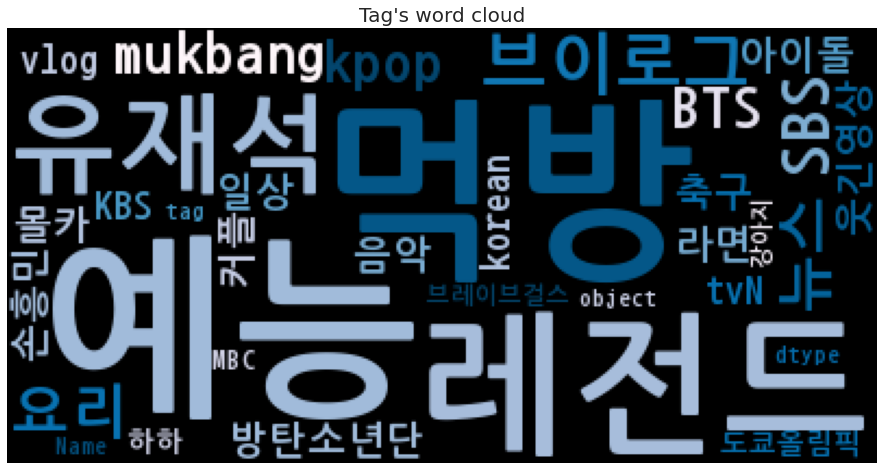

In [51]:
#wordcloud 생성
wordcloud =  WordCloud(background_color='black', 
                       font_path=path,relative_scaling=0.2,                      
                       
                       colormap = 'PuBu').generate(str(tags_all['tag'].head(30))) #상위 30개
plt.figure(figsize=(16,8))
plt.imshow(wordcloud)
plt.axis('off')
plt.title('Tag\'s word cloud' , size=20)
plt.show()

In [52]:
fig = make_subplots(rows=3,cols=2, #subplot shape
                    subplot_titles=[f'{month} 월' for month in months]) #subplot별 title
row=1 
col=1
for month in months: #번호와 month를 넣음             

    tags=[]
    for tag_li in list(df[df['month']==month]['tags'].str.split('|')): #태그들을 | 기준으로 나누고 전부 평면으로 만든다
        if type(tag_li) ==float:continue      
        for tag in tag_li :        
            tags.append(tag)
    tags=pd.DataFrame(tags)#dataframe으로 변경
    tags=pd.DataFrame(tags.value_counts(),columns = ['Counts']).sort_values('Counts',ascending=False).reset_index() #tag counts로 정렬 , 리셋인덱스
    tags.columns=['tag','counts'] #컬럼명 변경
    tags['ranks']=tags.index+1
    tags_30=tags.head(30)


    fig.add_trace(go.Bar(x=tags_30.tag, 
                            y=tags_30.counts,
                            #mode='markers', #marker만 사용                      
                            marker=dict(coloraxis="coloraxis", #컬러 축
                                        color=tags_30.counts,),                             
                            customdata=[ f'tag : {tg}<br>counts : {ct}<br>ranks : {rk}'for tg,ct,rk in zip(tags_30.tag,tags_30.counts,tags_30.ranks)],#mouse hover시 표시되는 값
                            hovertemplate='%{customdata}' #mouse hover시 표시설정                                                                   
                            ),
                row=row,col=col)   


    col+=1
    if col==3: # 다음위치에 배정
        row+=1
        col=1

fig.update_layout(coloraxis=dict(colorscale='Plasma'), showlegend=False, #범례 제거
                  width=1800,
                  height=1000,
                  #title=month[n]
                  ) # 카테고리 표시
fig.show()


# Q2 각각의 비디오는 시청자의 호응도(engagement)를 판단할 수 있는 객관적인 지표들이있다

view,likes, dislikes,comments...
- 비디오를 인기 동영상 기준에 부합하도록 분류할 수 있는 새로운 지표를 개발
- 이 지표를 사용해 engagement와 어떤 상관관계가 있는지 설명

이미 인기동영상 반열에 들어온 영상중 인기 동영상 즉, 프로중의 프로를 가르키는 지표를 찾는 것이라고 생각한다 
인기동영상에 올라오는 기준이 무엇인지 모르겠으나 
단순하게 보아도 높은 구독자수,조회수,좋아요, 적은 싫어요를 충족해야한다고 본다

초점을 동영상에 맞추고 채널에 대해 보진않을 예정이다

과연 인기동영상이란 무엇을까?
단순히 조회수나 좋아요가 많은게 인기동영상일까?

인기동영상을 어떤 알고리즘에 의한 랭킹이라고 볼때
올라올때 채널에 관심있는 구독자, 좁은 범위 혹은 의견에 동조하는 사람들, 혹은 아는사람, 어그로행위 등등 의 이유로 랭킹안에 들어와 대중적으로 노출되었을때 알고리즘에 의해 더이상 인기동영상이 아니라고 판단되는 동영상과 정말 좋은 동영상을 구분짓는 방법으로 인기동영상 유지 기간을 사용하려고한다

In [53]:
df.columns

Index(['index', 'video_id', 'channel_id', 'published_date', 'category_name',
       'duration', 'tags', 'description', 'on_trending_date',
       'off_trending_date', 'on_rank', 'off_rank', 'on_views', 'off_views',
       'on_likes', 'off_likes', 'on_dislikes', 'off_dislikes', 'on_comments',
       'off_comments', 'on_channel_subscribers', 'off_channel_subscribers',
       'on_channel_total_views', 'off_channel_total_views',
       'on_channel_total_videos', 'off_channel_total_videos', 'period_video',
       'month', 'period_m_count', 'published_todate'],
      dtype='object')

In [54]:
col=['on_views', 'off_views',
       'on_likes', 'off_likes', 'on_dislikes', 'off_dislikes', 'on_comments',
       'off_comments'] #랭킹을 위해 이상치를 제거하지않았지만 분석을 위해 이상치를 제거한다
for x in col:
    q1=df[x].quantile(0.25)
    q3=df[x].quantile(0.75)
    iqr=q3-q1
    condition=df[x]>q3+1.5*iqr #q3보다 iqr만큼 높은것
    condition2=df[x]<q1-1.5*iqr#q1보다 iqr만큼 낮은것
    a=df[condition].index
    b=df[condition2].index
    df.drop(a,inplace=True)
    df.drop(b,inplace=True)

In [55]:
#datatime 변환
df['on_trending_date']=pd.to_datetime(df['on_trending_date'])
df['off_trending_date']=pd.to_datetime(df['off_trending_date'])
df['published_date']=pd.to_datetime(df['published_date'])

df['up_to_trend']=df['on_trending_date']-df['published_date'] #동영상 업로드부터 인기동영상이 될때까지의 시간 #짧을수록 폭발적일것
df['up_to_trend']=df['up_to_trend'].dt.days #int로 변경
df['trend_to_out']=df['off_trending_date']-df['on_trending_date'] # 인기동영상에서 강등될떄까지의 시간 #길수록 화력이 유지될것 
df['trend_to_out']=df['trend_to_out'].dt.days #int로 변경

In [56]:
df['up_to_trend'].describe()

count    1571.000000
mean        2.065563
std         0.473668
min         1.000000
25%         2.000000
50%         2.000000
75%         2.000000
max         6.000000
Name: up_to_trend, dtype: float64

In [57]:
fig = px.bar(df['up_to_trend'].value_counts().reset_index().sort_values('index'),x='index',y='up_to_trend',#인기동영상이 된 영상들은 대부분 2일 내외로 인기동영상이 된다 
                 color='up_to_trend',
                 hover_data=['up_to_trend'],height=400,width=800)
fig.show()

In [58]:
df_up2t=df.groupby('up_to_trend').mean().iloc[:,3:] #4일부터는 너무 적은 양이라 배제했다
#df_up2t=df_up2t.drop('index',axis=1)

In [59]:
#업로드->진입시점 별 진입시점->강등될때까지 증가한 수치
fig = make_subplots(rows=2,cols=4, #subplot shape
                    subplot_titles=['diff_views','diff_likes','diff_dislikes','diff_comments','diff_subscribers','diff_total_views','diff_totalvideo']) #subplot별 title
nums=[0,2,4,6,8,10,12]
row=1 
col=1
for num in nums: #번호와 month를 넣음   

   
    fig.add_trace(go.Bar(x=[1],y=[df_up2t[df_up2t.columns[num+1]].loc[1]-df_up2t[df_up2t.columns[num]].loc[1]]),row=row,col=col)
    fig.add_trace(go.Bar(x=[2],y=[df_up2t[df_up2t.columns[num+1]].loc[2]-df_up2t[df_up2t.columns[num]].loc[2]]),row=row,col=col)
    fig.add_trace(go.Bar(x=[3],y=[df_up2t[df_up2t.columns[num+1]].loc[3]-df_up2t[df_up2t.columns[num]].loc[3]]),row=row,col=col)

    col+=1
    if col==5: # 다음위치에 배정
        row+=1
        col=1

fig.update_layout(coloraxis=dict(colorscale='Plasma'), showlegend=False, #범례 제거
                  width=1800,
                  height=800,
                  #title=month[n]
                  ) # 카테고리 표시
fig.show()


In [60]:
#진입 -> 강등까지 얼마나 유지했는가?
fig = px.bar(df['trend_to_out'].value_counts().reset_index().sort_values('index'),x='index',y='trend_to_out',
                 color='trend_to_out',
                 hover_data=['trend_to_out'],height=400,width=800)
fig.show()
#0은 잠깐 올라왔다 나가는 혹은 어그로성 인기동영상이라고 생각되며
#1은 보통 인기동영상
#2이상 부터는 인기동영상 중의 인기동영상이라고 예상한다

In [61]:
#주요 수치
main=['video_id', 'channel_id', 'category_name',
       'duration', 'tags', 'description', 'on_views', 'off_views',
       'on_likes', 'off_likes', 'on_dislikes', 'off_dislikes', 'on_comments',
       'off_comments', 'on_channel_subscribers', 'off_channel_subscribers',
       'on_channel_total_views', 'off_channel_total_views',
       'on_channel_total_videos', 'off_channel_total_videos']

In [62]:
#유지 일수 별로 나눔
aggro=df[df['trend_to_out']==0][main]
normal=df[df['trend_to_out']==1][main]
pop=df[df['trend_to_out']>=2][main]

In [63]:
aggro_mean=aggro.describe().reset_index()
aggro_mean=aggro_mean[aggro_mean['index']=='mean']

In [64]:
normal_mean=normal.describe().reset_index()
normal_mean=normal_mean[normal_mean['index']=='mean']

In [65]:
pop_mean=pop.describe().reset_index()
pop_mean=pop_mean[pop_mean['index']=='mean']

In [66]:
diff=pd.concat([aggro_mean,normal_mean,pop_mean]) #각 기간별 describe으로 만들어진 테이블

In [67]:
#계산을 하기위해 정수로 바꿔줌
diff[[ 'on_views', 'off_views', 'on_likes', 'off_likes',
       'on_dislikes', 'off_dislikes', 'on_comments', 'off_comments',
       'on_channel_subscribers', 'off_channel_subscribers',
       'on_channel_total_views', 'off_channel_total_views',
       'on_channel_total_videos', 'off_channel_total_videos']]=diff[[ 'on_views', 'off_views', 'on_likes', 'off_likes',
       'on_dislikes', 'off_dislikes', 'on_comments', 'off_comments',
       'on_channel_subscribers', 'off_channel_subscribers',
       'on_channel_total_views', 'off_channel_total_views',
       'on_channel_total_videos', 'off_channel_total_videos']].astype(int)

In [68]:
diff['name']=['aggro','normal','pop']

In [69]:
diff=diff.reset_index(drop=True)

In [70]:
diff.columns[1]

'on_views'

In [71]:
diff=diff.drop('index',axis=1)

aggro , normal , pop 별 on off간의 차이

In [72]:
#aggro , normal , pop 별 on off간의 차이
fig = make_subplots(rows=2,cols=4, #subplot shape
                    subplot_titles=['diff_views','diff_likes','diff_dislikes','diff_comments','diff_subscribers','diff_total_views','diff_totalvideo']) #subplot별 title
nums=[0,2,4,6,8,10,12]
row=1 
col=1
for num in nums: #번호와 month를 넣음   

   
    fig.add_trace(go.Bar(x=[1],y=[diff[diff.columns[num+1]][0]-diff[diff.columns[num]][0]]),row=row,col=col)
    fig.add_trace(go.Bar(x=[1],y=[diff[diff.columns[num+1]][1]-diff[diff.columns[num]][1]]),row=row,col=col)
    fig.add_trace(go.Bar(x=[1],y=[diff[diff.columns[num+1]][2]-diff[diff.columns[num]][2]]),row=row,col=col)

    col+=1
    if col==5: # 다음위치에 배정
        row+=1
        col=1

fig.update_layout(coloraxis=dict(colorscale='Plasma'), showlegend=False, #범례 제거
                  width=1800,
                  height=800,
                  #title=month[n]
                  ) # 카테고리 표시
fig.show()


당연하게도 오래버티는 동영상일수록 수치들이 높다, 여기서 볼때
하루도 못버틴 영상들은 차이가 0으로 되는데 자료를 수집할때 인기동영상을 체크하고 on off에 둘다 수치를 등록하고 다음 자료 수집때 중복되는 동영상일경우 off값만 수정하는 것으로 유추할 수 있다

findfont: Font family ['NanumGothicCoding'] not found. Falling back to DejaVu Sans.


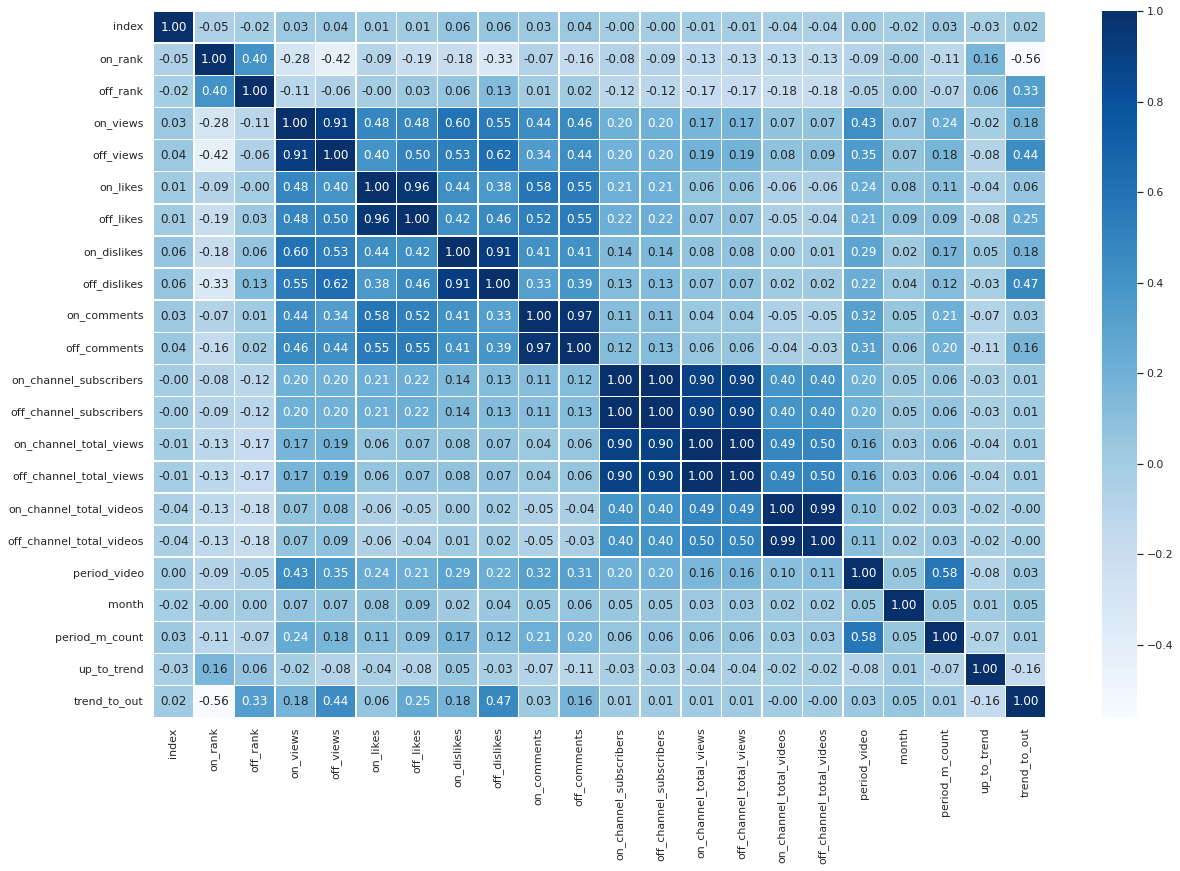

In [73]:
import seaborn as sb #상관관계
sb.heatmap(data = df.corr(), annot=True, fmt = '.2f', linewidths=.5, cmap='Blues')
sb.set(rc={'figure.figsize':(20,13)})

In [74]:
#바로 강등되지않은 normal과 pop만 가지고 만든 테이블
n_pop=pd.concat([normal,pop])
n_pop[[ 'on_views', 'off_views', 'on_likes', 'off_likes',
       'on_dislikes', 'off_dislikes', 'on_comments', 'off_comments',
       'on_channel_subscribers', 'off_channel_subscribers',
       'on_channel_total_views', 'off_channel_total_views',
       'on_channel_total_videos', 'off_channel_total_videos']]=n_pop[[ 'on_views', 'off_views', 'on_likes', 'off_likes',
       'on_dislikes', 'off_dislikes', 'on_comments', 'off_comments',
       'on_channel_subscribers', 'off_channel_subscribers',
       'on_channel_total_views', 'off_channel_total_views',
       'on_channel_total_videos', 'off_channel_total_videos']].astype(int)
n_pop=n_pop.reset_index(drop=True)

In [75]:
sum(diff['on_comments']/diff['on_likes'])/3 #코멘트와 좋아요의 비율은 약 14%


0.129100661539576

In [76]:
sum(diff['on_dislikes']/diff['on_likes'])/3 #0.01

0.01987721021525485

In [77]:
import math

In [78]:
df['on_pos']=((df['on_likes']*0.02-df['on_dislikes'])*df['on_comments'])/df['on_views'] #긍정도 * 호응도?

In [79]:

df['off_pos']=((df['off_likes']*0.02-df['off_dislikes'])*df['off_comments'])/df['off_views'] #긍정도 * 호응도??

In [80]:
fig=go.Figure() #on_pos 와 off_pos의 박스플롯
fig.add_trace(go.Box(x=df['on_pos']))
fig.add_trace(go.Box(x=df['off_pos']))
fig.show()

In [81]:
#on_pos 와 off_pos의 평균으로 만든 바플롯
df_pos=pd.DataFrame(df[df['trend_to_out']>=1][['on_pos','off_pos']].mean()).reset_index()
df_pos.columns=['pos_name','pos']
fig = px.bar(df_pos,x='pos_name',y='pos',
                 color='pos',
                 hover_data=['pos'],height=400,width=800)
fig.show()

In [82]:
df['on_hater']=df['on_dislikes']/df['on_views'] #싫어요 비율
df['off_hater']=df['off_dislikes']/df['off_views']
df['on_hater/like']=df['on_dislikes']/df['on_likes'] #좋아요 대비 싫어요 비율
df['off_hater/like']=df['off_dislikes']/df['off_likes']

In [83]:
df['rise_view']=df['off_views']/df['on_views'] #조회수 증가분

In [84]:
time_li=[] #duration을 초로 바꿈
for dur in df['duration']:    
    time=dur.split('PT')[1].split('H')    
    time_=0        
    if len(time) ==2:
        time_+=3600*int(time[0])
        time.pop(0)    
    time=time[0].split('M')   
    if len(time) ==2:
        time_+=60*int(time[0])
        time.pop(0)        
    time=time[0].split('S')        
    if len(time) ==2:
        time_+=int(time[0])     
        time_li.append(time_)
    else : time_li.append(time_)
df['duration_to_s']=time_li

In [85]:
df['off_hater'].mean()/df['on_hater'].mean()*100 #싫어요 비율 증가 비율

100.89872715906516

In [86]:
df['off_hater/like'].mean()/df['on_hater/like'].mean()*100 #좋아요 대비 싫어요 비율 증가 비율

109.83452556576022

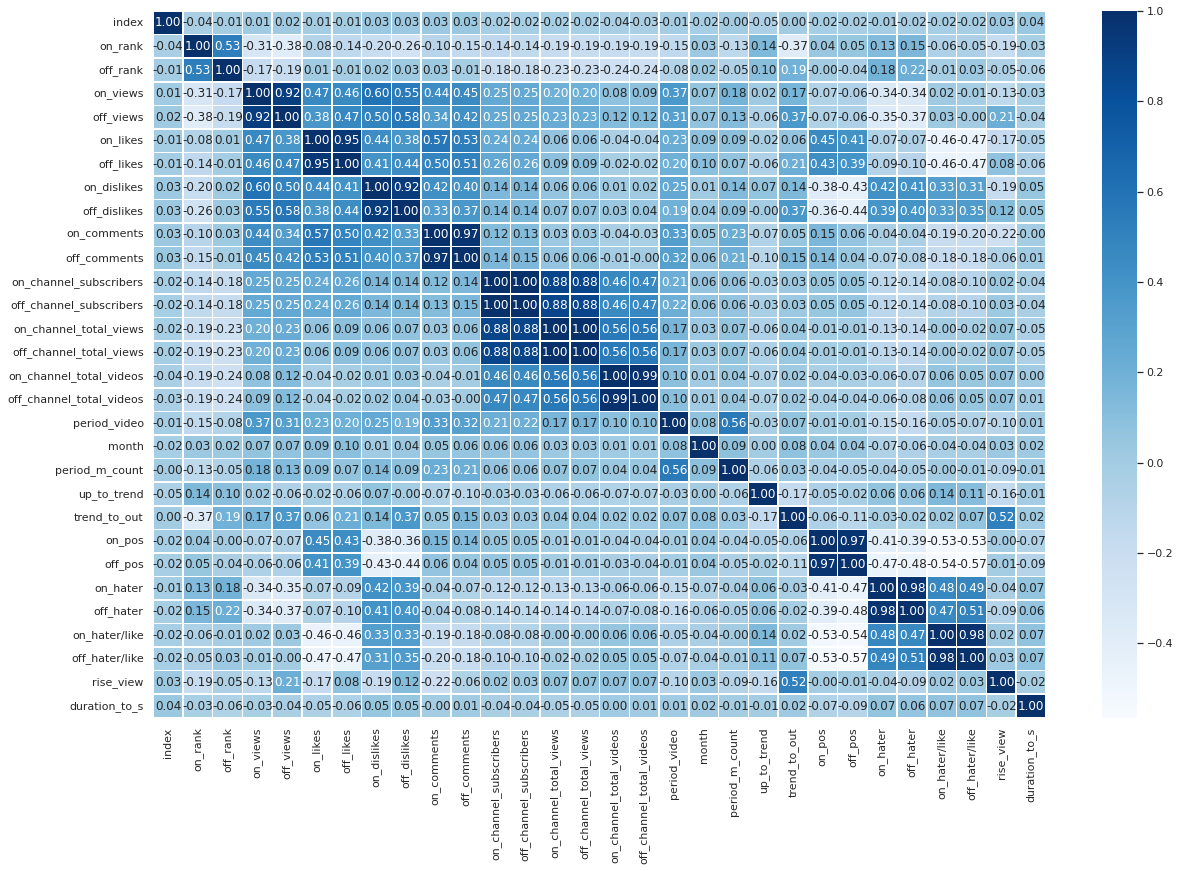

In [87]:
import seaborn as sb #상관관계 인기 유지기간 1이상
sb.heatmap(data = df[df['trend_to_out']>=1].corr(), annot=True, fmt = '.2f', linewidths=.5, cmap='Blues')
sb.set(rc={'figure.figsize':(20,13)})

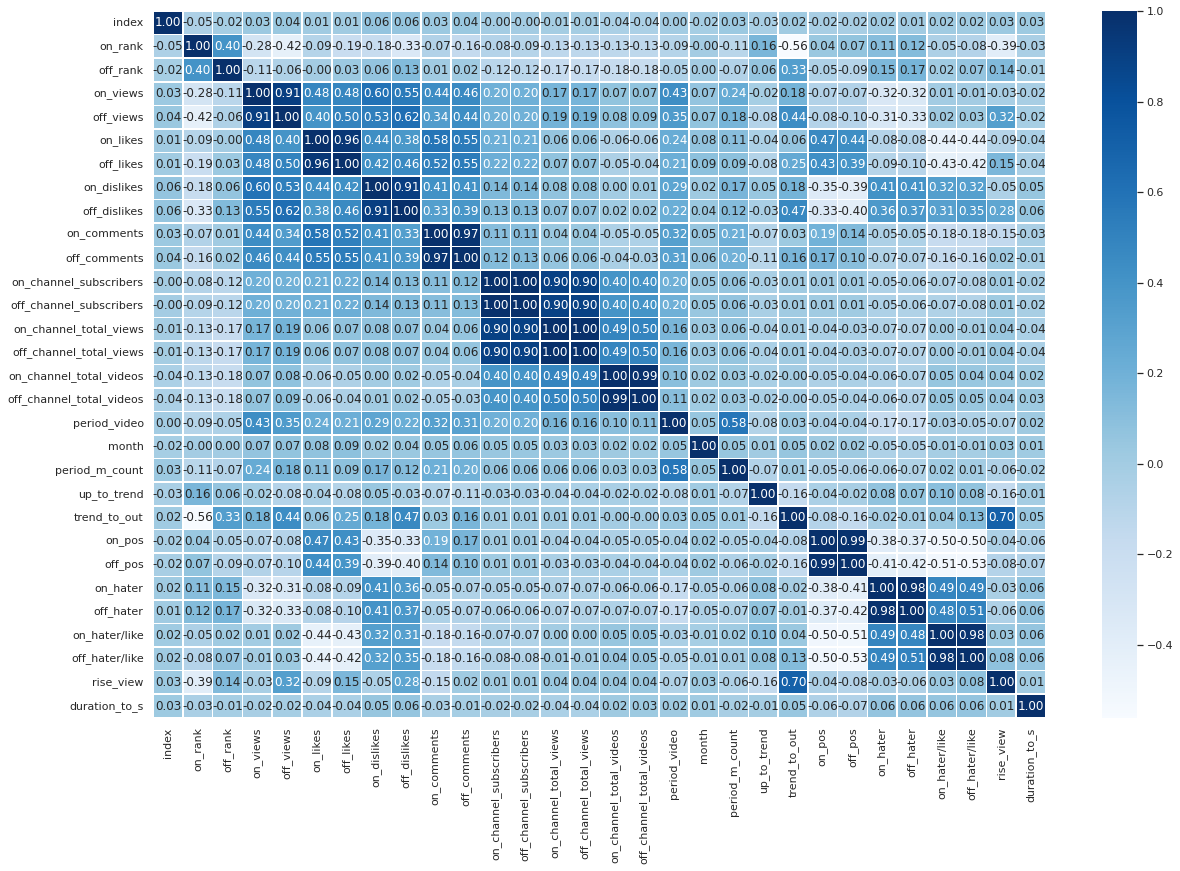

In [88]:
import seaborn as sb #상관관계
sb.heatmap(data = df.corr(), annot=True, fmt = '.2f', linewidths=.5, cmap='Blues')
sb.set(rc={'figure.figsize':(20,13)})

In [89]:
fig=go.Figure() #랭킹 25위를 기준으로 on_pos의 박스플롯
fig.add_trace(go.Box(x=df[df['on_rank']>25]['on_pos']))
fig.add_trace(go.Box(x=df[df['on_rank']<25]['on_pos']))
fig.show()